Daniil Abbruzzese
Github username: Daniilab
USC ID: 4721123667

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from IPython.display import display, Image
from pdf2image import convert_from_path
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import warnings
from scipy.stats import mode

# 1 (a)

In [4]:
df = pd.read_csv('../data/Frogs_MFCCS.csv')


# Split the data into a 70% train and 30% test set
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)  # random_state for reproducibility

train_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407,Dendrobatidae,Ameerega,Ameeregatrivittata,13
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221,Hylidae,Hypsiboas,HypsiboasCinerascens,37
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,15
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006,Leptodactylidae,Adenomera,AdenomeraAndre,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014,Hylidae,Hypsiboas,HypsiboasCinerascens,36
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656,Hylidae,Hypsiboas,HypsiboasCinerascens,37


# 1 (b) i & ii

Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers.

1. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. 
2. Report exact match and hamming score 

In [56]:
#encoding the classes, defining x and y

le_family = LabelEncoder()
le_genus = LabelEncoder()
le_species = LabelEncoder()

# Fit label encoders to the training data
le_family.fit(train_df['Family'])
le_genus.fit(train_df['Genus'])
le_species.fit(train_df['Species'])

# Fit label encoders and transform the class labels to numbers
train_df['FamilyEncoded'] = le_family.transform(train_df['Family'])
train_df['GenusEncoded'] = le_genus.transform(train_df['Genus'])
train_df['SpeciesEncoded'] = le_species.transform(train_df['Species'])

# Separate the features and the labels.
X_train = train_df.drop(['Family', 'Genus', 'Species','FamilyEncoded','GenusEncoded','SpeciesEncoded','RecordID'], axis=1)
y_family_train = train_df['FamilyEncoded']
y_genus_train = train_df['GenusEncoded']
y_species_train = train_df['SpeciesEncoded']


# Fit label encoders and transform the class labels to numbers
test_df['FamilyEncoded'] = le_family.transform(test_df['Family'])
test_df['GenusEncoded'] = le_genus.transform(test_df['Genus'])
test_df['SpeciesEncoded'] = le_species.transform(test_df['Species'])

# Separate the features and the labels.
X_test = test_df.drop(['Family', 'Genus', 'Species','FamilyEncoded','GenusEncoded','SpeciesEncoded', 'RecordID'], axis=1)
y_family_test = test_df['FamilyEncoded']
y_genus_test = test_df['GenusEncoded']
y_species_test = test_df['SpeciesEncoded']

X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.438532,-0.148451,-0.260375,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.108483,0.329984,0.274031,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.073050,-0.140994,0.162584,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.404813,-0.075488,-0.320882,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.132244,0.190753,0.126674,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.378497,-0.014091,-0.352985,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.228140,-0.274889,0.244973,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.177708,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.047610,-0.188463,0.102240,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656


In [18]:

# Define a range of values for C and gamma to be tested by 10-fold cross-validation.
param_grid = {
    'estimator__svc__C': [0.1, 1, 10, 100],
    'estimator__svc__gamma': [0.01, 0.1, 1]
}

# If you have a pipeline named 'pipeline', and the SVC step is named 'svc':
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling improves SVM performance.
    ('svc', SVC(kernel='rbf', probability=True))
])

In [29]:
# Perform grid search with 10-fold cross-validation for each label.

# For 'Family'
grid_search_family = GridSearchCV(OneVsRestClassifier(pipeline), param_grid, cv=10)
grid_search_family.fit(X_train, y_family_train)

# For 'Genus'
grid_search_genus = GridSearchCV(OneVsRestClassifier(pipeline), param_grid, cv=10)
grid_search_genus.fit(X_train, y_genus_train)

# For 'Species'
grid_search_species = GridSearchCV(OneVsRestClassifier(pipeline), param_grid, cv=10,  n_jobs=-1)
grid_search_species.fit(X_train, y_species_train)

In [20]:
print(f"Best parameters for 'Family': {grid_search_family.best_params_}")
print(f"Best score for 'Family': {grid_search_family.best_score_}")

print(f"Best parameters for 'Genus': {grid_search_genus.best_params_}")
print(f"Best score for 'Genus': {grid_search_genus.best_score_}")

print(f"Best parameters for 'Species': {grid_search_species.best_params_}")
print(f"Best score for 'Species': {grid_search_species.best_score_}")

Best parameters for 'Family': {'estimator__svc__C': 10, 'estimator__svc__gamma': 0.01}
Best score for 'Family': 0.9988083404335889
Best parameters for 'Genus': {'estimator__svc__C': 100, 'estimator__svc__gamma': 0.01}
Best score for 'Genus': 0.9984103316608287
Best parameters for 'Species': {'estimator__svc__C': 100, 'estimator__svc__gamma': 0.01}
Best score for 'Species': 0.9976166808671779


In [28]:

#Finding Exact match and Hamming score now that we have identified best hyper parameters

#access trained models like this:
model_family = grid_search_family.best_estimator_
model_genus = grid_search_genus.best_estimator_
model_species = grid_search_species.best_estimator_

# Predictions for each label
y_pred_family = model_family.predict(X_test)
y_pred_genus = model_genus.predict(X_test)
y_pred_species = model_species.predict(X_test)

# Combine predictions into a single multi-label array
y_pred_combined = np.vstack((y_pred_family, y_pred_genus, y_pred_species)).T
y_true_combined = np.vstack((y_family_test, y_genus_test, y_species_test)).T

# Manually calculate Exact Match Score
exact_matches = np.all(y_pred_combined == y_true_combined, axis=1)
exact_match_score = np.average(exact_matches)
print(f"Exact Match Score: {exact_match_score}")


# Manually calculate Hamming Loss
# Calculate the number of label mismatches for each sample
mismatches = np.sum(np.not_equal(y_true_combined, y_pred_combined), axis=1)
# Calculate the total number of mismatches
total_mismatches = np.sum(mismatches)
# Divide by the total number of labels
total_labels = np.prod(y_true_combined.shape)
hamming_loss_value = total_mismatches / total_labels
# Subtract the Hamming Loss from 1 to get the Hamming Score
hamming_score = 1 - hamming_loss_value
print(f"Hamming Score: {hamming_score}")


Exact Match Score: 0.9967577582213988
Hamming Score: 0.9983016828778756


# 1 (b) iii

Repeat 1(b)ii with
L
1
-penalized SVMs.
3
Remember to standardize
4
the attributes. Determine the weight of the SVM penalty using 10 fold cross vali-
dation.

In [58]:

# Define a range of values for C to be tested by 10-fold cross-validation.
param_grid = {
    'estimator__svc__C': [0.1, 1, 10, 100]
}

# Set up a pipeline with an L1-penalized SVM.
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', LinearSVC(penalty='l1', dual=False, max_iter=10000))  # Use dual=False when n_samples > n_features
])

# For 'Family'
grid_search_family = GridSearchCV(OneVsRestClassifier(pipeline), param_grid, cv=10, n_jobs=-1)
grid_search_family.fit(X_train, y_family_train)

# For 'Genus'
grid_search_genus = GridSearchCV(OneVsRestClassifier(pipeline), param_grid, cv=10, n_jobs=-1)
grid_search_genus.fit(X_train, y_genus_train)

# For 'Species'
grid_search_species = GridSearchCV(OneVsRestClassifier(pipeline), param_grid, cv=10, n_jobs=-1)
grid_search_species.fit(X_train, y_species_train)


# Print the best parameters and the corresponding score for each classifier
print(f"Best parameters for 'Family': {grid_search_family.best_params_}")
print(f"Best score for 'Family': {grid_search_family.best_score_}")

print(f"Best parameters for 'Genus': {grid_search_genus.best_params_}")
print(f"Best score for 'Genus': {grid_search_genus.best_score_}")

print(f"Best parameters for 'Species': {grid_search_species.best_params_}")
print(f"Best score for 'Species': {grid_search_species.best_score_}")



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters for 'Family': {'estimator__svc__C': 1}
Best score for 'Family': 0.9406288459717882
Best parameters for 'Genus': {'estimator__svc__C': 10}
Best score for 'Genus': 0.9527422764997319
Best parameters for 'Species': {'estimator__svc__C': 10}
Best score for 'Species': 0.9602847202499291


In [60]:
#Finding Exact match and Hamming score now that we have identified best hyper parameters for L1


#access trained models like this:
model_family_l1 = grid_search_family.best_estimator_
model_genus_l1 = grid_search_genus.best_estimator_
model_species_l1 = grid_search_species.best_estimator_

# Predictions for each label
y_pred_family = model_family_l1.predict(X_test)
y_pred_genus = model_genus_l1.predict(X_test)
y_pred_species = model_species_l1.predict(X_test)

# Combine predictions into a single multi-label array
y_pred_combined = np.vstack((y_pred_family, y_pred_genus, y_pred_species)).T
y_true_combined = np.vstack((y_family_test, y_genus_test, y_species_test)).T

# Manually calculate Exact Match Score
exact_matches = np.all(y_pred_combined == y_true_combined, axis=1)
exact_match_score = np.average(exact_matches)
print(f"Exact Match Score: {exact_match_score}")


# Manually calculate Hamming Loss
# Calculate the number of label mismatches for each sample
mismatches = np.sum(np.not_equal(y_true_combined, y_pred_combined), axis=1)
# Calculate the total number of mismatches
total_mismatches = np.sum(mismatches)
# Divide by the total number of labels
total_labels = np.prod(y_true_combined.shape)
hamming_loss_value = total_mismatches / total_labels
# Subtract the Hamming Loss from 1 to get the Hamming Score
hamming_score = 1 - hamming_loss_value
print(f"Hamming Score: {hamming_score}")


Exact Match Score: 0.9129226493747105
Hamming Score: 0.9431835726416551


# 1 (b) iv

Repeat 1(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classifiers you trained.

In [62]:


# Define a range of values for C to be tested by 10-fold cross-validation.
param_grid = {
    'estimator__svc__C': [0.01, 0.1, 1, 10, 100]
}

# Set up a pipeline with SMOTE and an L1-penalized SVM.
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svc', LinearSVC(penalty='l1', dual=False, max_iter=10000))
])

# Perform grid search with 10-fold cross-validation for each label.
# For 'Family'
grid_search_family = GridSearchCV(OneVsRestClassifier(pipeline), param_grid, cv=10, n_jobs=-1)
grid_search_family.fit(X_train, y_family_train)


# For 'Genus'
grid_search_genus = GridSearchCV(OneVsRestClassifier(pipeline), param_grid, cv=10, n_jobs=-1)
grid_search_genus.fit(X_train, y_genus_train)

# For 'Species'
grid_search_species = GridSearchCV(OneVsRestClassifier(pipeline), param_grid, cv=10, n_jobs=-1)
grid_search_species.fit(X_train, y_species_train)

# Print the best parameters and the corresponding score for each classifier
print(f"Best parameters for 'Family': {grid_search_family.best_params_}")
print(f"Best score for 'Family': {grid_search_family.best_score_}")

print(f"Best parameters for 'Genus': {grid_search_genus.best_params_}")
print(f"Best score for 'Genus': {grid_search_genus.best_score_}")

print(f"Best parameters for 'Species': {grid_search_species.best_params_}")
print(f"Best score for 'Species': {grid_search_species.best_score_}")


#access trained models like this:
model_family_l1_smote = grid_search_family.best_estimator_
model_genus_l1_smote = grid_search_genus.best_estimator_
model_species_l1_smote = grid_search_species.best_estimator_

Best parameters for 'Family': {'estimator__svc__C': 1}
Best score for 'Family': 0.9352693363627758
Best parameters for 'Genus': {'estimator__svc__C': 10}
Best score for 'Genus': 0.9374526649626054
Best parameters for 'Species': {'estimator__svc__C': 1}
Best score for 'Species': 0.955321247120452


In [63]:
#Finding Exact match and Hamming score now that we have identified best hyper parameters

# Predictions for each label
y_pred_family = model_family_l1_smote.predict(X_test)
y_pred_genus = model_genus_l1_smote.predict(X_test)
y_pred_species = model_species_l1_smote.predict(X_test)

# Combine predictions into a single multi-label array
y_pred_combined = np.vstack((y_pred_family, y_pred_genus, y_pred_species)).T
y_true_combined = np.vstack((y_family_test, y_genus_test, y_species_test)).T

# Manually calculate Exact Match Score
exact_matches = np.all(y_pred_combined == y_true_combined, axis=1)
exact_match_score = np.average(exact_matches)
print(f"Exact Match Score: {exact_match_score}")


# Manually calculate Hamming Loss
# Calculate the number of label mismatches for each sample
mismatches = np.sum(np.not_equal(y_true_combined, y_pred_combined), axis=1)
# Calculate the total number of mismatches
total_mismatches = np.sum(mismatches)
# Divide by the total number of labels
total_labels = np.prod(y_true_combined.shape)
hamming_loss_value = total_mismatches / total_labels
# Subtract the Hamming Loss from 1 to get the Hamming Score
hamming_score = 1 - hamming_loss_value
print(f"Hamming Score: {hamming_score}")

Exact Match Score: 0.9004168596572487
Hamming Score: 0.9380886212752818


### Conclusions: The SVM model from b ii, which did not use L1 penalized or SMOTE, performed the best, yielding an Exact Match Score of 0.9967577582213988 and a Hamming Score of 0.9983016828778756

# 2 K-Means Clustering on a Multi-Class and Multi-Label Data Set

Monte-Carlo Simulation:
Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate.

# 2 (a)

Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split
the data into train and test, as we are not performing supervised learning in this
exercise). Choose
k
∈ {
1
,
2
, . . . ,
50
}
automatically based on one of the methods
provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any
other method you know.

In [2]:
df = pd.read_csv('../data/Frogs_MFCCS.csv')


# df_labels = df[['Family', 'Genus', 'Species']]


df_features = df.drop(columns=['Family', 'Genus', 'Species','RecordID'])

# df_features
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [6]:
warnings.filterwarnings("ignore")


# Function to find the optimal number of clusters using k-means clustering
# based on the Calinski-Harabasz score.
def find_optimal_k(df):
    ch_scores = []
    
    # We will start from k=2 since CH score cannot be calculated for k=1.
    for k in range(2, 51):
        # Apply k-means clustering
        kmeans = KMeans(n_clusters=k).fit(df)
        # Get the cluster labels
        cluster_labels = kmeans.labels_
        # Calculate the CH score
        ch_score = calinski_harabasz_score(df, cluster_labels)
        ch_scores.append((k, ch_score))
    
    # Sort the scores in descending order and select the k with the highest CH score
    optimal_k = sorted(ch_scores, key=lambda x: x[1], reverse=True)[0][0]
    return optimal_k

# Apply the function to find the optimal k
optimal_k = find_optimal_k(df_features)

# optimal_k is the optimal number of clusters found
# ch_scores is a list of tuples where each tuple contains a value of k and the corresponding CH score
print("Optimal number of clusters:", optimal_k)


Optimal number of clusters: 2


# 2 (b)

In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species.

In [7]:


#re fitting k mean cluster now that we found optimal k
kmeans = KMeans(n_clusters=optimal_k)

clusters = kmeans.fit_predict(df_features)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters


def find_majority_classes(df, cluster_col, categories):
    # Start with an empty DataFrame that will be filled with majority classes for each category
    majority_df = pd.DataFrame()
    
    for category in categories:
        # For each category, group by the cluster label and find the mode
        majority_series = df.groupby(cluster_col)[category].agg(lambda x: mode(x).mode[0])
        # Add this as a new column to the majority_df DataFrame
        majority_df[f'Majority_{category}'] = majority_series

    # Reset the index to have 'Cluster' as a column instead of an index
    majority_df.reset_index(inplace=True)
    
    return majority_df

# Apply the function to find the majority for each category within each cluster
categories = ['Family', 'Genus', 'Species']
majority_df = find_majority_classes(df, 'Cluster', categories)

# Now, majority_df contains all the information in one DataFrame
majority_df


,Cluster,Majority_Family,Majority_Genus,Majority_Species
0,0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,1,Hylidae,Hypsiboas,HypsiboasCordobae


In [8]:
# Merge the majority labels with the original data on the cluster label.
labeled_df = df.merge(majority_df, on='Cluster')

labeled_df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID,Cluster,Majority_Family,Majority_Genus,Majority_Species
0,1.000000,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1,1,Hylidae,Hypsiboas,HypsiboasCordobae
1,1.000000,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1,1,Hylidae,Hypsiboas,HypsiboasCordobae
2,1.000000,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1,1,Hylidae,Hypsiboas,HypsiboasCordobae
3,1.000000,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1,1,Hylidae,Hypsiboas,HypsiboasCordobae
4,1.000000,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1,1,Hylidae,Hypsiboas,HypsiboasCordobae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.000000,-0.220459,0.040485,0.725401,0.220055,0.180145,0.268315,-0.049049,-0.010656,-0.080996,...,0.284273,-0.223010,Leptodactylidae,Leptodactylus,LeptodactylusFuscus,47,0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
7191,1.000000,0.314321,0.438354,0.312396,-0.059697,0.230965,0.162220,-0.013198,0.139567,-0.037269,...,-0.005701,-0.029319,Leptodactylidae,Leptodactylus,LeptodactylusFuscus,47,0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
7192,1.000000,-0.044767,-0.296560,0.622061,0.705717,0.037129,-0.375170,0.012101,0.309628,0.090657,...,-0.047660,-0.117560,Leptodactylidae,Leptodactylus,LeptodactylusFuscus,47,0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
7193,0.552979,-0.117934,0.948724,1.000000,0.192211,0.087915,-0.077421,0.520603,0.220196,-0.434532,...,-0.015846,0.106632,Hylidae,Scinax,ScinaxRuber,57,0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


In [9]:

# Merge the majority labels with the original data on the cluster label.
labeled_df = df.merge(majority_df, on='Cluster')

# True labels columns
true_labels = ['Family', 'Genus', 'Species']

# Predicted (majority) labels columns
predicted_labels = ['Majority_Family', 'Majority_Genus', 'Majority_Species']


labeled_df[predicted_labels]
labeled_df[true_labels]
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID,Cluster
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60,1
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60,1
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60,1
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60,1


# 2 (c)

Now for each cluster you have a majority label triplet (family, genus, species).
Calculate the average Hamming distance, Hamming score, and Hamming loss
5
between the true labels and the labels assigned by clusters.

In [10]:
def compute_hamming(df):
    results = {}
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]

        hamming_distances = (
            (cluster_data['Family'] != cluster_data['Majority_Family']) +
            (cluster_data['Genus'] != cluster_data['Majority_Genus']) +
            (cluster_data['Species'] != cluster_data['Majority_Species'])
        )
        
        avg_hamming_distance = hamming_distances.mean()
        hamming_loss = avg_hamming_distance / 3  # There are three labels
        hamming_score = 1 - hamming_loss

        results[cluster] = {
            "Average Hamming Distance": avg_hamming_distance,
            "Hamming Loss": hamming_loss,
            "Hamming Score": hamming_score
        }

    return results

# Compute and print the results for both clusters
results = compute_hamming(labeled_df)
for cluster, metrics in results.items():
    print(f"Cluster {cluster}: Avg Hamming Distance = {metrics['Average Hamming Distance']}, "
          f"Hamming Loss = {metrics['Hamming Loss']}, Hamming Score = {metrics['Hamming Score']}")


Cluster 1: Avg Hamming Distance = 0.6922435362802335, Hamming Loss = 0.2307478454267445, Hamming Score = 0.7692521545732555
Cluster 0: Avg Hamming Distance = 0.03557531962201223, Hamming Loss = 0.011858439874004076, Hamming Score = 0.988141560125996


# Monte Carlo: Performing the procedures 50 times and reporting the average and standard deviation of the 50 Hamming Distances that you calculate.

In [18]:
#newest version

def perform_clustering_and_compute_average_hamming(data):
    
    optimal_k = find_optimal_k(data)

    if optimal_k > 2:
        print(f"optimal_k = {optimal_k}")

    # Fitting KMeans clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_k)
    clusters = kmeans.fit_predict(data)

    df['Cluster'] = clusters
    
    majority_df = find_majority_classes(df, 'Cluster', categories)

    # Merge the majority labels with the original data on the cluster label.
    labeled_df = df.merge(majority_df, on='Cluster')

    results = compute_hamming(labeled_df)

    # Aggregate results for all clusters to find overall metrics
    overall_hamming_distance = np.mean([result['Average Hamming Distance'] for result in results.values()])
    overall_hamming_score = np.mean([result['Hamming Score'] for result in results.values()])
    overall_hamming_loss = np.mean([result['Hamming Loss'] for result in results.values()])
    
    return overall_hamming_distance, overall_hamming_score, overall_hamming_loss


# Lists to store the Hamming metrics
hamming_distances = []
hamming_scores = []
hamming_losses = []

# Repeat the process 50 times
for _ in range(50):
    distance, score, loss = perform_clustering_and_compute_average_hamming(df_features)
    hamming_distances.append(distance)
    hamming_scores.append(score)
    hamming_losses.append(loss)

# Compute the average and standard deviation for the Hamming distance
average_hamming_distance = np.mean(hamming_distances)
std_dev_hamming_distance = np.std(hamming_distances)

# Compute the average for the Hamming score and loss
average_hamming_score = np.mean(hamming_scores)
average_hamming_loss = np.mean(hamming_losses)

print(f"Average Hamming Distance: {average_hamming_distance}, Standard Deviation: {std_dev_hamming_distance}")
print(f"Average Hamming Score: {average_hamming_score}, Average Hamming Loss: {average_hamming_loss}")

Average Hamming Distance: 0.3639094279511228, Standard Deviation: 5.551115123125783e-17
Average Hamming Score: 0.8786968573496255, Average Hamming Loss: 0.1213031426503743


# 3 - ISLR 12.6.2

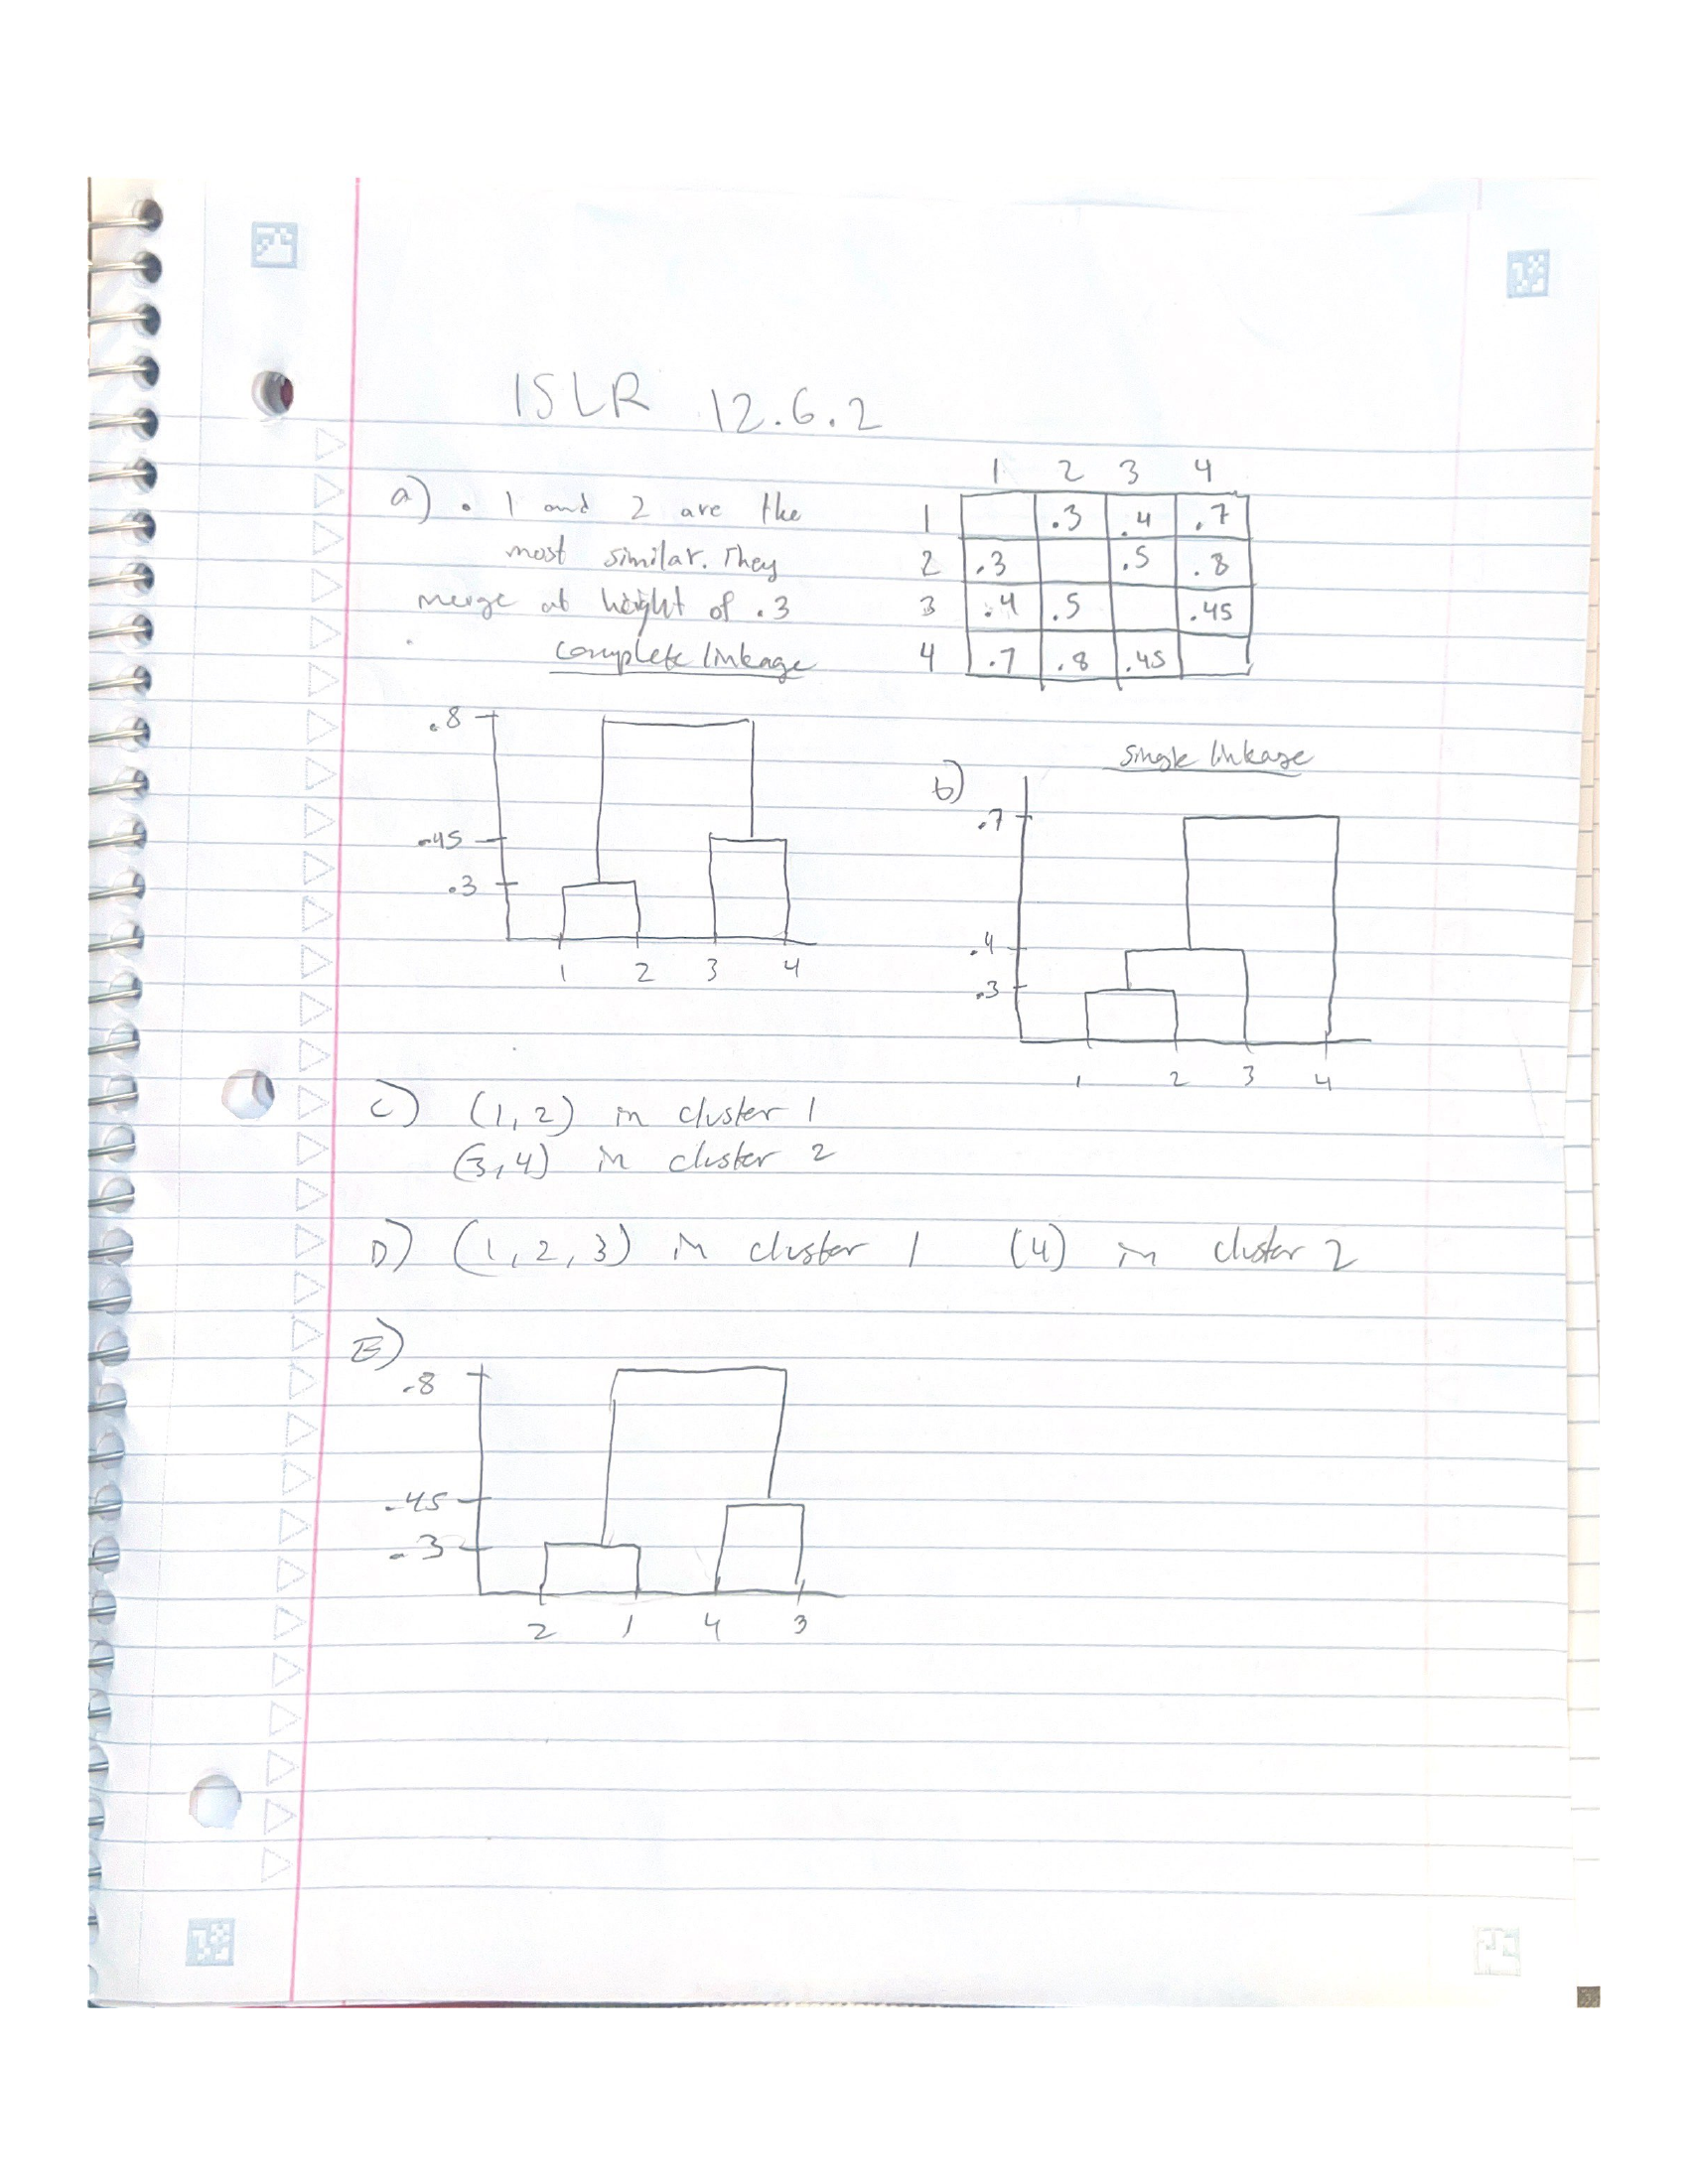

In [2]:

# Convert PDF to list of images
images = convert_from_path('../data/12.6.2.pdf')

# Display the first page (adjust the index for other pages)
display(images[0])